In [3]:
%pylab inline
import torch
import torch.nn.functional as F
import numpy as np
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

Populating the interactive namespace from numpy and matplotlib


Notes from the [Deep Learning Book](https://www.deeplearningbook.org/)

# Ch.8 Optimization for Training Deep Models

### 8.1 How Learning Differs from Pure Optimization

$$\renewcommand\vec{\boldsymbol}$$

... The simplest way to convert a machine learning problem back into an optimization problem is to minimize the expected loss on the training set. This means replacing the true distribution $p(\vec x, y)$ with the empirical distribution $\hat p (\vec x, y)$ defined by the training set. We now minimize the **empirical risk**

$$\mathbb{E}_{\vec x, y \sim \hat p (\vec x, y)}[L(f(\vec x; \vec{\theta}), y)] = \frac 1 m \sum_{i=1}^m L(f(\vec x^{(i)}; \vec{\theta}), y^{(i)})$$

One aspect of machine learning algorithms that separates them from general optimization algorithms is that the objective function usually decomposes as a sum over the training examples.

Most algorithms used for deep learning fall somewhere in between using all the training examples at one time and using only one example at one time. This is traditionaly called **minibatch**.

[[5.11502822]
 [6.86289417]
 [2.91206464]
 [6.93571393]] 
[[ 7.62209503]
 [12.33939802]
 [ 5.62443397]
 [ 8.44063388]]


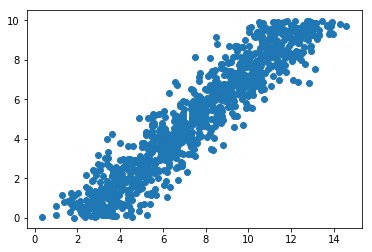

In [5]:
x = 10*np.random.rand(1024,1)
y = x + np.random.randn(1024,1) + 2.5
print x[:4],"\n", y[:4]
scatter(y[:,0], x[:,0]);

In [15]:
# https://stackoverflow.com/questions/45113245/how-to-get-mini-batches-in-pytorch-in-a-clean-and-efficient-way

model = torch.nn.Sequential(
    torch.nn.Linear(1,1),
)

X = torch.tensor(x, device=device, dtype = dtype)
Y = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

n_epochs = 10 # or whatever
batch_size = 256 # or whatever

for epoch in range(n_epochs):

    permutation = torch.randperm(X.size()[0])

    for i in range(0, X.size()[0], batch_size):
        optimizer.zero_grad()

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X[indices], Y[indices]

        outputs = model.forward(batch_x)
        loss = loss_fn(outputs, batch_y)

        loss.backward()
        optimizer.step()
    print loss.item()
    

817.844604492
419.670227051
358.354705811
394.368591309
391.074798584
343.042144775
288.537231445
344.297668457
283.838287354
346.11517334


### 8.7.1 Batch Normalization

https://pytorch.org/docs/stable/_modules/torch/nn/modules/batchnorm.html

https://discuss.pytorch.org/t/example-on-how-to-use-batch-norm/216

### 8.7.6 Continuation Methods and Curriculum Learning

https://ronan.collobert.com/pub/matos/2009_curriculum_icml.pdf

https://nlp.stanford.edu/pubs/babyfrog.pdf